In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# **Problem 1** 


# *Initial parametres*




In [ ]:
Ts = 20
T_inj = 20
T_inj_2 = 90
Rg = 2650
k = 2.92
Cp = 1000
Kappa = 0.0952
D = 2500 
Rw = 0.15
tbh = 245
W = 20
alpha = 0.09
Cw = 3160
x = [0, 500, 1000, 1500, 2000, 2500]
t = [0.1 , 1, 10, 30]

In [ ]:
# Depth
y = [(D - i) for i in x]
print('Depth:',y)

# td
td = [((float(Kappa)*i)/(Rw*Rw)) for i in t]
print('td:',td)

#ft
ft = [(np.log(1+1.7*(i**0.5))) for i in td]
print('ft:',ft)

#A
A = [((W*Cw*i)/(2*k*np.pi)) for i in ft]
print('A:',A)

Depth: [2500, 2000, 1500, 1000, 500, 0]
td: [0.42311111111111116, 4.231111111111112, 42.31111111111112, 126.93333333333335]
ft: [0.7446948994323216, 1.5033755996089235, 2.489727391761608, 3.00335306266909]
A: [2565.2679651666012, 5178.71314578594, 8576.422270318353, 10345.720650998224]


In [ ]:
T = [((tbh-alpha*i) + (alpha*j*(1 - np.exp(-1*i/j)))) for j in A for i in x]
t_01 = [T[i] for i in range(6)]
t_1 = [T[i] for i in range(6,12)]
t_10 = [T[i] for i in range(12,18)]
t_30 = [T[i] for i in range(18,24)]

In [ ]:
T_inj_final1 = [(Ts + alpha*i - alpha*j + (T_inj-Ts+alpha*j)*np.exp(-1*i/j)) for j in A for i in x]

In [ ]:
t_inj_01 = [T_inj_final1[i] for i in range(6)]
t_inj_1 = [T_inj_final1[i] for i in range(6,12)]
t_inj_10 = [T_inj_final1[i] for i in range(12,18)]
t_inj_30 = [T_inj_final1[i] for i in range(18,24)]

In [ ]:
T_inj_final2 = [(Ts + alpha*i - alpha*j + (T_inj_2-Ts+alpha*j)*np.exp(-1*i/j)) for j in A for i in x]

In [ ]:
t_inj2_01 = [T_inj_final2[i] for i in range(6)]
t_inj2_1 = [T_inj_final2[i] for i in range(6,12)]
t_inj2_10 = [T_inj_final2[i] for i in range(12,18)]
t_inj2_30 = [T_inj_final2[i] for i in range(18,24)]

In [ ]:
var = [(alpha*i+20) for i in x]

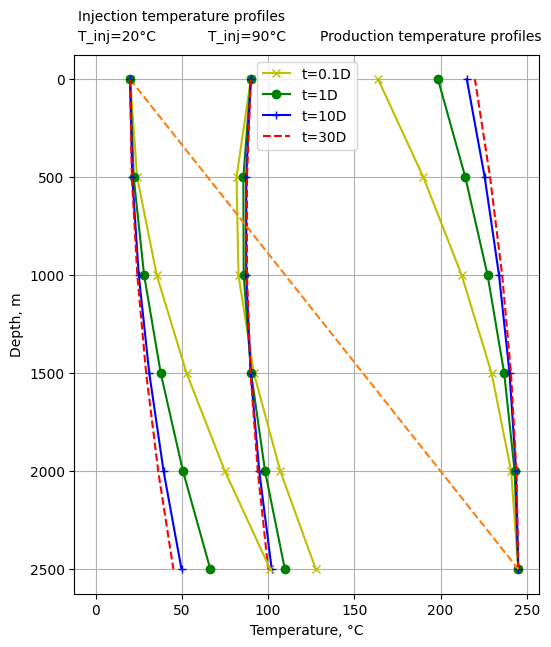

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6,7))
plt.plot(t_inj2_01, x , 'y-x' , t_inj2_1, x ,'g-o', t_inj2_10, x, 'b+-' , t_inj2_30, x, 'r--', 
         t_01, y , 'y-x' , t_1, y ,'g-o', t_10, y, 'b+-' , t_30, y, 'r--',0.5)
plt.text(-10,-300,'Injection temperature profiles')
plt.text(-10,-200,'T_inj=20°C')
plt.text(65,-200,'T_inj=90°C')
plt.text(130,-200,'Production temperature profiles')
plt.plot(var, x, '--')
plt.plot(t_inj_01, x , 'y-x' , label = "t=0.1D")
plt.plot(t_inj_1, x ,'g-o', label = "t=1D")
plt.plot(t_inj_10, x, 'b+-' , label = "t=10D")
plt.plot(t_inj_30, x, 'r--', label = "t=30D")
plt.xlabel('Temperature, °C')
plt.ylabel('Depth, m')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# **Problem 2**



# *Initial parametres*

In [ ]:
Tl = [100, 150, 200]
k_r2 = [5, 10]
x = [i/10 for i in range(1,10)]
z = [j for j in range(1,11)]
x += z
t = int(input("Enter your day: "))

Enter your day: 342


In [ ]:
ts_old_list = []
ts_new_list = []
def iteration(t,x,Tl,k_r2):
  ts_old = t
  Td = k_r2 * t 
  ft = (np.log(1+1.7*(Td**0.5)))
  ts_new = (((1/0.2)*Tl)/x*(1-(1+x/ft)*np.exp(-1*x/ft)))
  if (abs((ts_new - ts_old)/ts_new)) < 0.000001:
    ts_new_list.append(ts_new)
    ts_old_list.append(ts_old)
    return (ts_new_list , x, Tl, k_r2)
  else:
    return iteration(ts_new, x, Tl, k_r2) 

In [ ]:
for z in range(2):
  for j in range(3):
    for i in range(19):
      iteration(t,x[i],Tl[j],k_r2[z])

In [ ]:
ts_1 = [ts_new_list[i] for i in range(19)]
ts_2 = [ts_new_list[i] for i in range(19,38)]
ts_3 = [ts_new_list[i] for i in range(38,57)]
ts_4 = [ts_new_list[i] for i in range(57,76)]
ts_5 = [ts_new_list[i] for i in range(76,95)]
ts_6 = [ts_new_list[i] for i in range(95,114)]

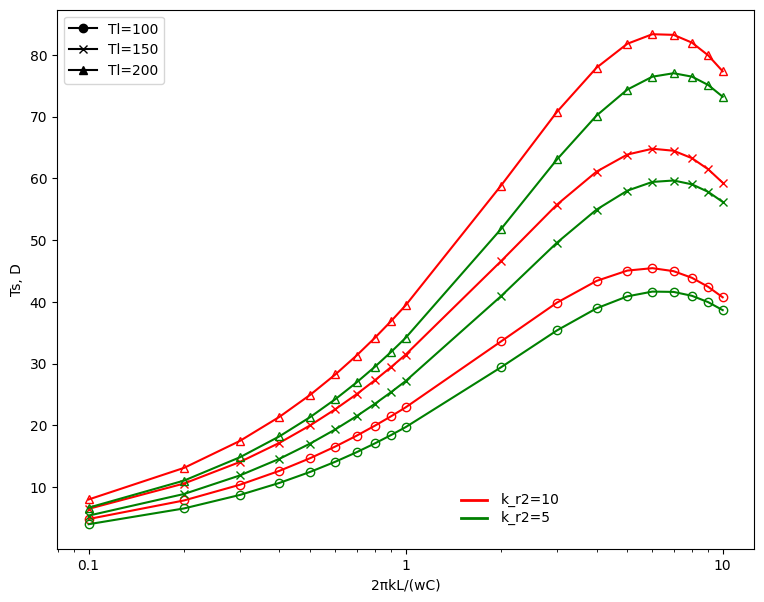

In [ ]:
plt.figure(figsize=(9, 7))
plt.plot(x, ts_1, 'r-o', label='Tl=100', fillstyle='none')
plt.plot(x, ts_2, 'r-x', label='Tl=150')
plt.plot(x, ts_3, 'r-^', label='Tl=200', fillstyle='none')
plt.plot(x, ts_4, 'g-o', fillstyle='none')
plt.plot(x, ts_5, 'g-x')
plt.plot(x, ts_6, 'g-^', fillstyle='none')

plt.text(2, 8, 'k_r2=10', fontsize=10, ha='left', va='center')
plt.text(2, 5, 'k_r2=5', fontsize=10, ha='left', va='center')
plt.plot([1.5, 1.8], [8, 8], color='red', linestyle='-', linewidth=2)
plt.plot([1.5, 1.8], [5, 5], color='green', linestyle='-', linewidth=2)

handles = [plt.Line2D([], [], color='black', marker='o', linestyle='-'),
                   plt.Line2D([], [], color='black', marker='x', linestyle='-'),
                   plt.Line2D([], [], color='black', marker='^', linestyle='-')]
labels = ['Tl=100', 'Tl=150', 'Tl=200']
plt.legend(handles, labels, loc='best')
plt.xscale('log') 
formatter = FuncFormatter(lambda y, _: '{:.2g}'.format(y))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('2πkL/(wC)')
plt.ylabel('Ts, D')
plt.show()